# Test Case 2: US Cancer Statistics

**Use Case:** Public health researcher analyzing cancer mortality trends

**Dataset:** United States Cancer Statistics, 2018-2023 Mortality Single race.csv

**Goal:** 
- Explore the CSV data structure
- Test data profile extraction for tabular health data
- Create visualizations for mortality rate analysis


In [ ]:
# Setup
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, str(Path.cwd()))

import vibe_widget as vw
from vibe_widget.data_parser.preprocessor import preprocess_data

import os
API_KEY = os.getenv("ANTHROPIC_API_KEY")

print("Setup complete!")


Setup complete!


## Step 1: Exploratory Data Analysis (EDA)


In [12]:
# Load the CSV file
data_path = Path("testdata/United States Cancer Statistics, 2018-2023 Mortality Single race.csv")

print(f"Loading: {data_path}")
print(f"File exists: {data_path.exists()}")

# Load data
df = pd.read_csv(data_path)

print(f"\nDataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\n" + "="*60)
print("First few rows:")
print("="*60)
df.head()


Loading: testdata/United States Cancer Statistics, 2018-2023 Mortality Single race.csv
File exists: True

Dataset shape: (126, 13)
Columns: ['Notes', 'Cancer Sites', 'Cancer Sites Code', 'Deaths', 'Population', 'Age-Adjusted Rate', 'Age-Adjusted Rate Lower 95% Confidence Interval', 'Age-Adjusted Rate Upper 95% Confidence Interval', 'Age-Adjusted Rate Standard Error', 'Crude Rate', 'Crude Rate Lower 95% Confidence Interval', 'Crude Rate Upper 95% Confidence Interval', 'Crude Rate Standard Error']

First few rows:


,Notes,Cancer Sites,Cancer Sites Code,Deaths,Population,Age-Adjusted Rate,Age-Adjusted Rate Lower 95% Confidence Interval,Age-Adjusted Rate Upper 95% Confidence Interval,Age-Adjusted Rate Standard Error,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error
0,NaN,All Cancer Sites Combined,0,3628122.0,1.986930e+09,145.5,145.4,145.7,0.1,182.6,182.4,182.8,0.1
1,NaN,Oral Cavity and Pharynx,20010-20100,66546.0,1.986930e+09,2.6,2.6,2.6,0.0,3.3,3.3,3.4,0.0
2,NaN,Lip,20010,467.0,1.986930e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,Tongue,20020,17472.0,1.986930e+09,0.7,0.7,0.7,0.0,0.9,0.9,0.9,0.0
4,NaN,Salivary Gland,20030,6495.0,1.986930e+09,0.3,0.3,0.3,0.0,0.3,0.3,0.3,0.0


In [13]:
# Data info
print("Data Info:")
print("="*60)
print(df.info())

print("\n" + "="*60)
print("Summary Statistics:")
print("="*60)
print(df.describe())

print("\n" + "="*60)
print("Missing Values:")
print("="*60)
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values")


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 13 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Notes                                            43 non-null     object 
 1   Cancer Sites                                     83 non-null     object 
 2   Cancer Sites Code                                83 non-null     object 
 3   Deaths                                           83 non-null     float64
 4   Population                                       83 non-null     float64
 5   Age-Adjusted Rate                                83 non-null     float64
 6   Age-Adjusted Rate Lower 95% Confidence Interval  83 non-null     float64
 7   Age-Adjusted Rate Upper 95% Confidence Interval  83 non-null     float64
 8   Age-Adjusted Rate Standard Error                 83 non-null     float64
 9   Crude Rate           

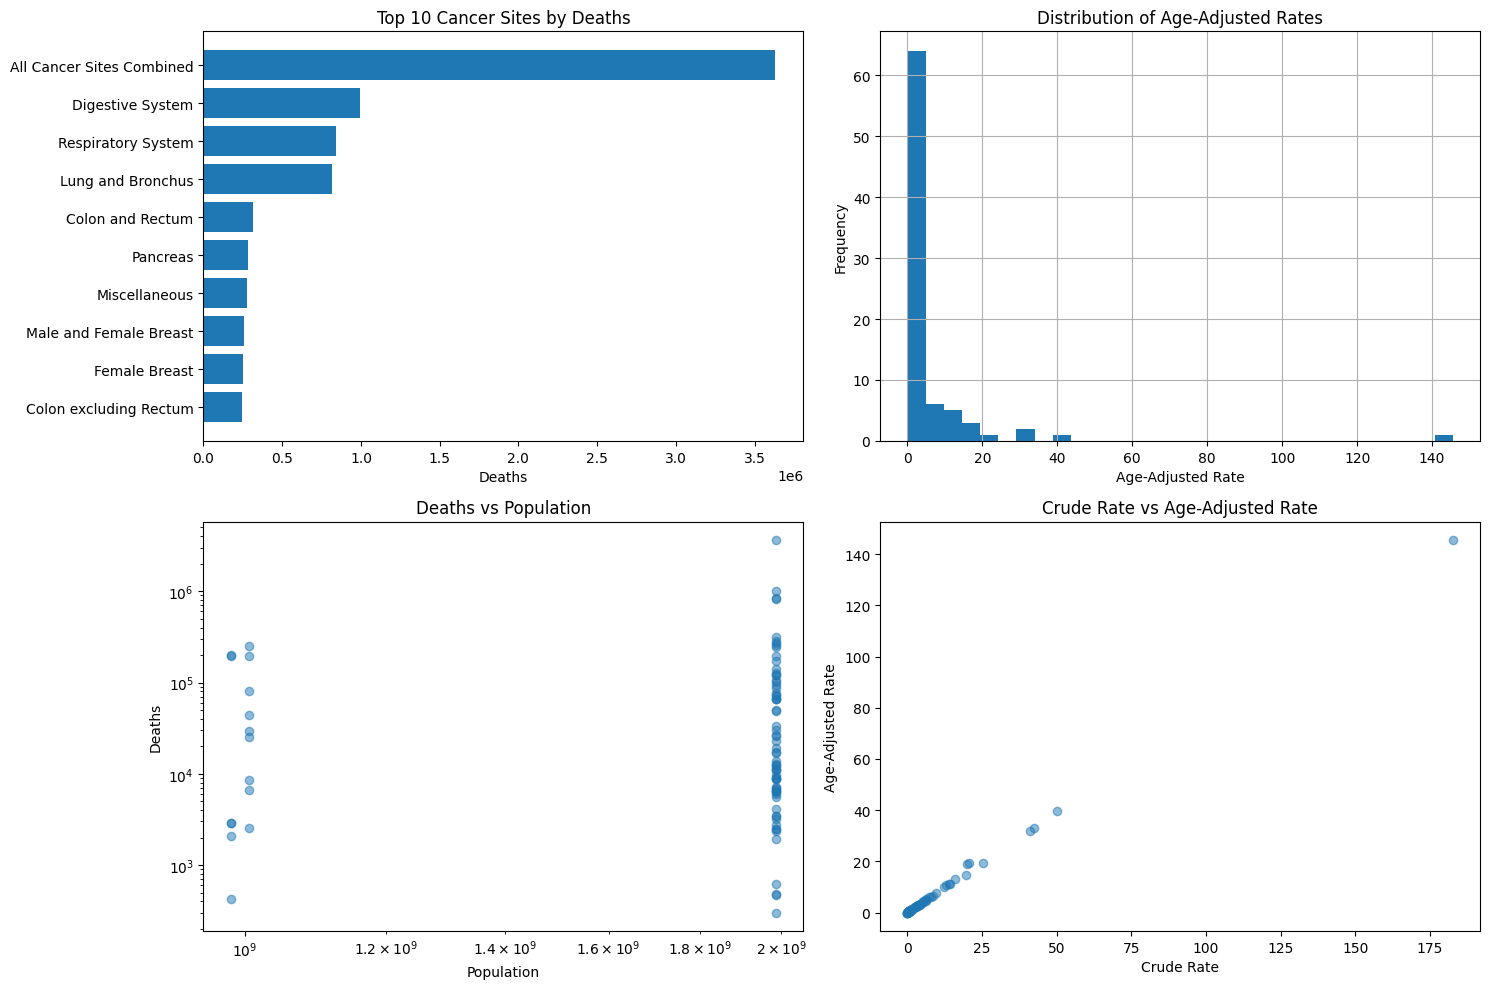

In [14]:
# Quick visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Top cancer sites by deaths
if 'Deaths' in df.columns and 'Cancer Sites' in df.columns:
    top_cancers = df.nlargest(10, 'Deaths')[['Cancer Sites', 'Deaths']]
    axes[0, 0].barh(range(len(top_cancers)), top_cancers['Deaths'])
    axes[0, 0].set_yticks(range(len(top_cancers)))
    axes[0, 0].set_yticklabels(top_cancers['Cancer Sites'])
    axes[0, 0].set_xlabel('Deaths')
    axes[0, 0].set_title('Top 10 Cancer Sites by Deaths')
    axes[0, 0].invert_yaxis()

# Age-adjusted rate distribution
if 'Age-Adjusted Rate' in df.columns:
    df['Age-Adjusted Rate'].hist(bins=30, ax=axes[0, 1])
    axes[0, 1].set_xlabel('Age-Adjusted Rate')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('Distribution of Age-Adjusted Rates')

# Deaths vs Population
if 'Deaths' in df.columns and 'Population' in df.columns:
    axes[1, 0].scatter(df['Population'], df['Deaths'], alpha=0.5)
    axes[1, 0].set_xlabel('Population')
    axes[1, 0].set_ylabel('Deaths')
    axes[1, 0].set_title('Deaths vs Population')
    axes[1, 0].set_xscale('log')
    axes[1, 0].set_yscale('log')

# Crude rate vs Age-adjusted rate
if 'Crude Rate' in df.columns and 'Age-Adjusted Rate' in df.columns:
    axes[1, 1].scatter(df['Crude Rate'], df['Age-Adjusted Rate'], alpha=0.5)
    axes[1, 1].set_xlabel('Crude Rate')
    axes[1, 1].set_ylabel('Age-Adjusted Rate')
    axes[1, 1].set_title('Crude Rate vs Age-Adjusted Rate')

plt.tight_layout()
plt.show()


## Step 2: Test Data Profile Extraction


In [15]:
# Create data profile with LLM augmentation
print("Creating data profile...")
profile = preprocess_data(
    data_path,
    api_key=API_KEY,
    augment=True,
    context={
        "domain": "public health",
        "description": "US Cancer Statistics mortality data from 2018-2023",
        "purpose": "Analyze cancer mortality rates and trends across different cancer types"
    }
)

print("\n" + "="*60)
print("Data Profile Summary")
print("="*60)
print(profile.to_markdown())


Creating data profile...

Data Profile Summary
# Dataset Profile: csv
**Source:** `testdata/United States Cancer Statistics, 2018-2023 Mortality Single race.csv`

## Overview
- **Shape:** 126 × 13
- **Completeness:** 63.4%

## Fields

### `Notes` (categorical)
- Count: 43 | Missing: 83 | Top values: --- (5), in accordance with a 1998 recommendation of the US. Department of Health and Human Services. The 2000 U.S. standard population (1), http://seer.cancer.gov/codrecode/.). Because NCHS uses different groupings for some sites, the death rates in this report may (1) | Unique: 39

### `Cancer Sites` (text)
- Count: 83 | Missing: 43

### `Cancer Sites Code` (text)
- Count: 83 | Missing: 43

### `Deaths` (numeric)
- Count: 83 | Missing: 43 | Range: [302.00, 3628122.00] | Mean: 131239.30

### `Population` (numeric)
- Count: 83 | Missing: 43 | Range: [982002056.00, 1986930368.00] | Mean: 1807802797.20

### `Age-Adjusted Rate` (numeric)
- Count: 83 | Missing: 43 | Range: [0.00, 145.50] | Mean

In [16]:
# Inspect profile details
print("Profile Details:")
print(f"  Source Type: {profile.source_type}")
print(f"  Shape: {profile.shape}")
print(f"  Completeness: {profile.completeness:.1%}")
print(f"  Inferred Domain: {profile.inferred_domain}")
print(f"  Dataset Purpose: {profile.dataset_purpose}")
print(f"\n  Key Insights: {len(profile.key_insights)} insights")
for i, insight in enumerate(profile.key_insights[:5], 1):
    print(f"    {i}. {insight}")
print(f"\n  Suggested Visualizations: {len(profile.suggested_visualizations)} suggestions")
for i, viz in enumerate(profile.suggested_visualizations[:5], 1):
    print(f"    {i}. {viz}")

# Column meanings
print(f"\n  Column Meanings:")
for col in profile.columns[:5]:
    if col.inferred_meaning:
        print(f"    - {col.name}: {col.inferred_meaning}")


Profile Details:
  Source Type: csv
  Shape: (126, 13)
  Completeness: 63.4%
  Inferred Domain: None
  Dataset Purpose: None

  Key Insights: 0 insights

  Suggested Visualizations: 0 suggestions

  Column Meanings:


## Step 3: Create Visualization Widget


In [17]:
description = """
Create an interactive cancer mortality visualization that shows:
- Scatter plot comparing crude rate vs age-adjusted rate
- Interactive filtering by cancer type
"""

widget = vw.create(
    description,
    df,
    api_key=API_KEY,
    context={
        "domain": "public health",
        "purpose": "cancer mortality analysis",
        "key_insights": profile.key_insights[:3] if profile.key_insights else []
    }
)


/Users/r4yen/repos/sundayhack/vibe-widgets/venv311/lib/python3.11/site-packages/jupyter_client/session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)
